# Transfer Learning

This project explores transfer learning, a common use case in deep learning. We'll download a pre-trained model using the "https://docs.fast.ai/tutorial.vision.html" tutorial from the Fastai website (https://docs.fast.ai/tutorial.vision.html) and adapt it to the Oxford-IIIT Pet Dataset (https://www.robots.ox.ac.uk/~vgg/data/pets/).

In general both transfer learning methods follow the same few steps:

- Initialize the pretrained model
- Reshape the final layer(s) to have the same number of outputs as the number of classes in the new dataset
- Define for the optimization algorithm which parameters we want to update during training
- Run the training step

In [3]:
from fastai.vision.all import *

In [16]:
image_path = untar_data(URLs.PETS)

We start by grabbing the image files

In [17]:
files = get_image_files(image_path/"images")
len(files)

7390

There is an easy way to distinguish between cats and dogs: the name of the file begins with a capital for cats, and a lowercased letter for dogs:

In [18]:
files[0],files[200]

(Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_132.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_192.jpg'))

We define the label function:

In [19]:
def label_func(f): return f[0].isupper()

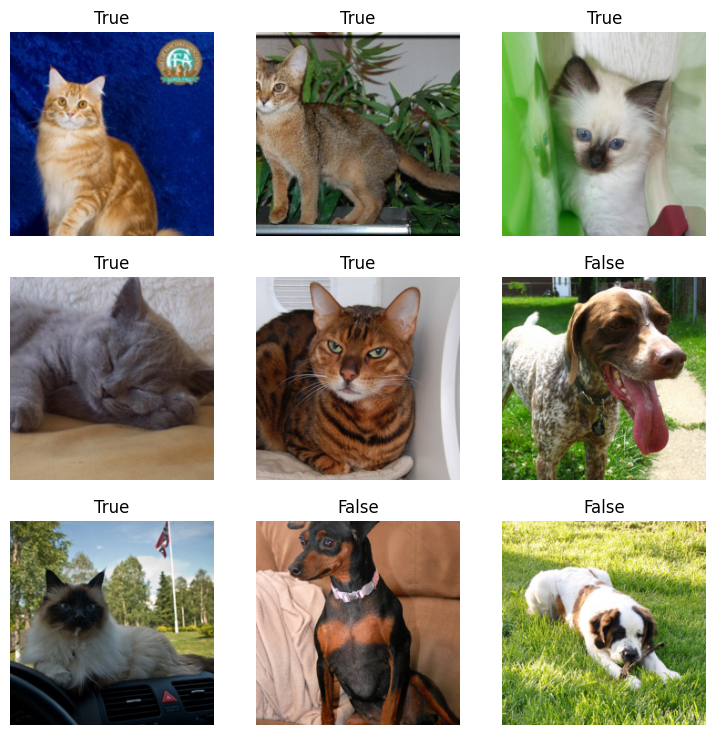

In [20]:
dls = ImageDataLoaders.from_name_func(image_path, files, label_func, item_tfms=Resize(224))
dls.show_batch()

In [21]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2, freeze_epochs=2)

accuracy_after = learn.validate()[1]
print(f"Accuracy after fine-tuning: {accuracy_after}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.184970,0.023768,0.993234,00:56
1,0.070329,0.031336,0.991881,00:56


epoch,train_loss,valid_loss,accuracy,time
0,0.044960,0.047834,0.988498,00:58
1,0.030393,0.004490,0.998647,00:59


Accuracy after fine-tuning: 0.9986467957496643


# Classifying breeds

In [23]:
files[0].name

'Egyptian_Mau_132.jpg'

The class is everything before the last _ followed by some digits. A regular expression that will catch the name is thus:

In [24]:
pat = r'^(.*)_\d+.jpg'

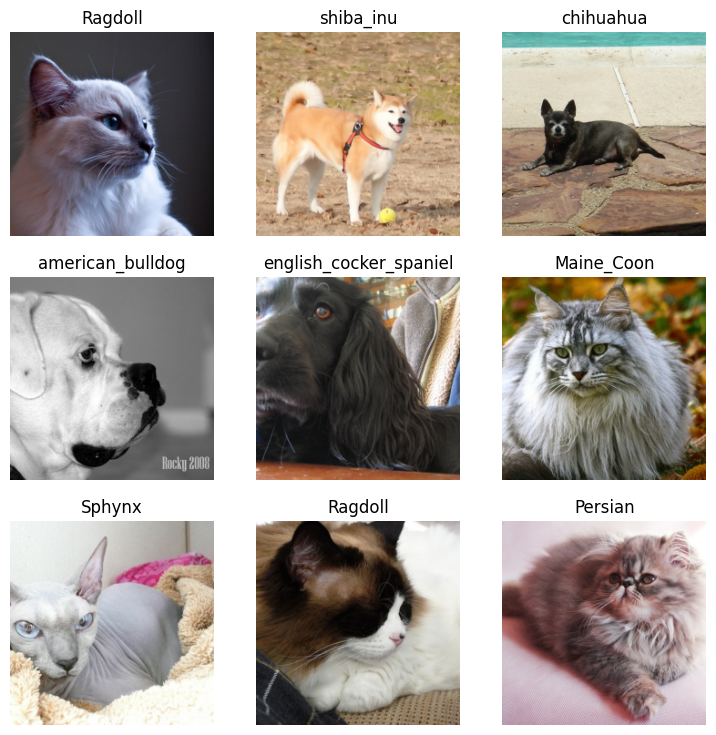

In [25]:
dls = ImageDataLoaders.from_name_re(image_path, files, pat, item_tfms=Resize(224))
dls.show_batch()

Since classifying the exact breed of cats or dogs amongst 37 different breeds is a harder problem, we will slightly change the definition of our DataLoaders to use data augmentation:

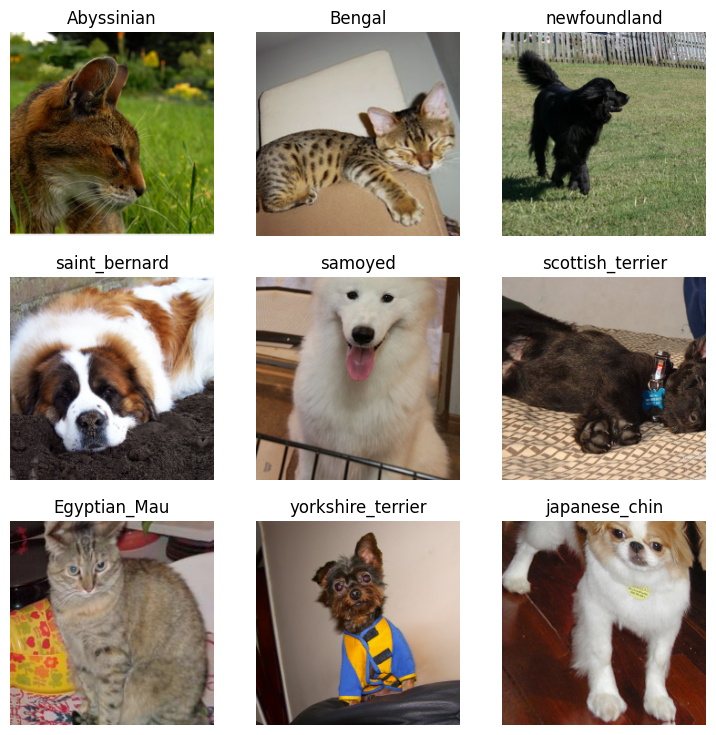

In [26]:
dls = ImageDataLoaders.from_name_re(image_path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))
dls.show_batch()

SuggestedLRs(valley=0.001737800776027143)

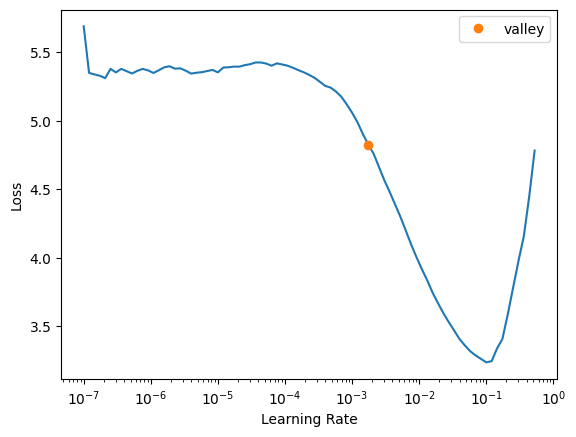

In [29]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

learn.lr_find()

It plots the graph of the learning rate finder and gives us two suggestions (minimum divided by 10 and steepest gradient). Let’s use 3e-3 here. We will also do a bit more epochs:

In [31]:
learn.fine_tune(10, 17e-4, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,2.781056,0.660405,0.805819,01:16
1,1.006478,0.296866,0.898512,01:17
2,0.579890,0.279792,0.910014,01:16


epoch,train_loss,valid_loss,accuracy,time
0,0.340597,0.217306,0.927605,01:19
1,0.296243,0.221259,0.921516,01:19
2,0.270087,0.228308,0.924899,01:18
3,0.238643,0.220641,0.931664,01:18
4,0.168287,0.227072,0.924899,01:19
5,0.137536,0.215386,0.933018,01:18
6,0.099781,0.212556,0.939784,01:18
7,0.067738,0.183114,0.946549,01:19
8,0.052085,0.178880,0.949256,01:19
9,0.035862,0.179217,0.949932,01:20


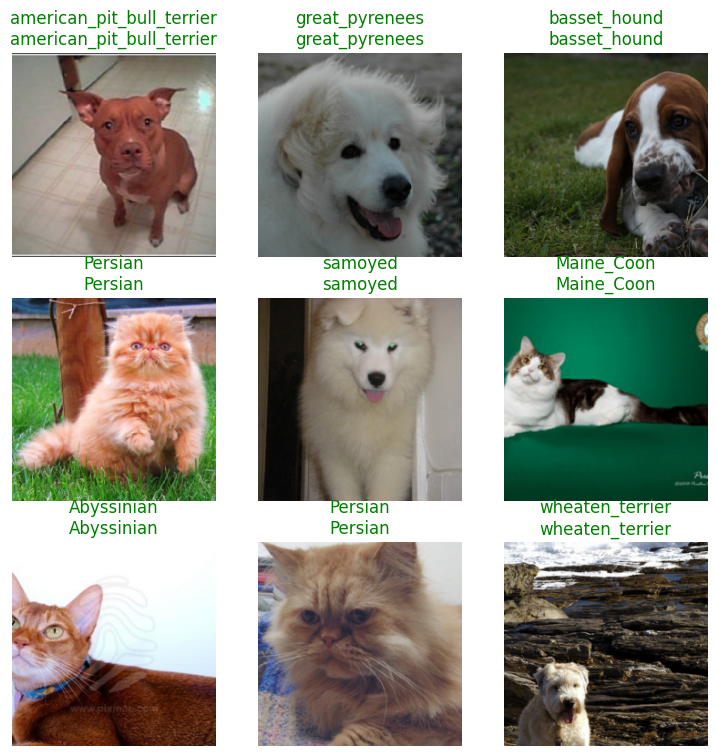

In [ ]:
learn.show_results()